# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os
%matplotlib inline

In [2]:
def ensure_dir(file_path):
    if not os.path.exists(file_path):
        os.makedirs(file_path)

In [3]:
def Gaussian_filter_2d_Rot(x, y, x0, y0, xs, ys, angle, A):
    cx = x[np.newaxis,:]*np.ones_like(y)[:,np.newaxis]  -x0
    cy = np.ones_like(x)[np.newaxis,:]*y[:,np.newaxis]-y0
    rx =  cx*np.cos(angle) - cy*np.sin(angle) 
    ry =  cx*np.sin(angle) + cy*np.cos(angle)
    return A*(np.exp(-((rx/xs)**2+(ry/ys)**2)/2))

# Main

In [4]:
BS = loadmat('D:\\GoogleDrive\\retina\\oled_boundary_set', squeeze_me =True)

figmap = [[np.nan, 7,15,23,31,39,47,np.nan],
          [     1, 8,16,24,32,40,48,    55],
          [     2, 9,17,25,33,41,49,    56],
          [     3,10,18,26,34,42,50,    57],
          [     4,11,19,27,35,43,51,    58],
          [     5,12,20,28,36,44,52,    59],
          [     6,13,21,29,37,45,53,    60],
          [np.nan,14,22,30,38,46,54,np.nan]]
figmap = np.array(figmap)

In [5]:
exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513\\'
ensure_dir(exp_folder+'STA')
ensure_dir(exp_folder+'STA\\Fig')

RFprop = loadmat(exp_folder+'Analyzed_data\\30Hz_27_RF_15min_re\\unsort\\RF_properties.mat', squeeze_me =True)
RFprop = RFprop['RF_properties']

dt = 1./60.
window = [-1, 1]
timeshift = np.arange(window[0],window[1],dt)
direction ='UD'

In [6]:
RFellipse=[0]*60
for cn in np.arange(1,61):
    if not type(RFprop[cn-1]['Amplitude']) == float:     continue
    RFellipse[cn-1] = Gaussian_filter_2d_Rot(np.arange(1,801), np.arange(1,601), 
                                             RFprop[cn-1]['X_Coor'], RFprop[cn-1]['Y_Coor'],
                                             RFprop[cn-1]['X_Width']/1.5/BS['micro_per_pixel'],
                                             RFprop[cn-1]['Y_Width']/1.5/BS['micro_per_pixel'],
                                             RFprop[cn-1]['Angle'], RFprop[cn-1]['Amplitude'])

# fc

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

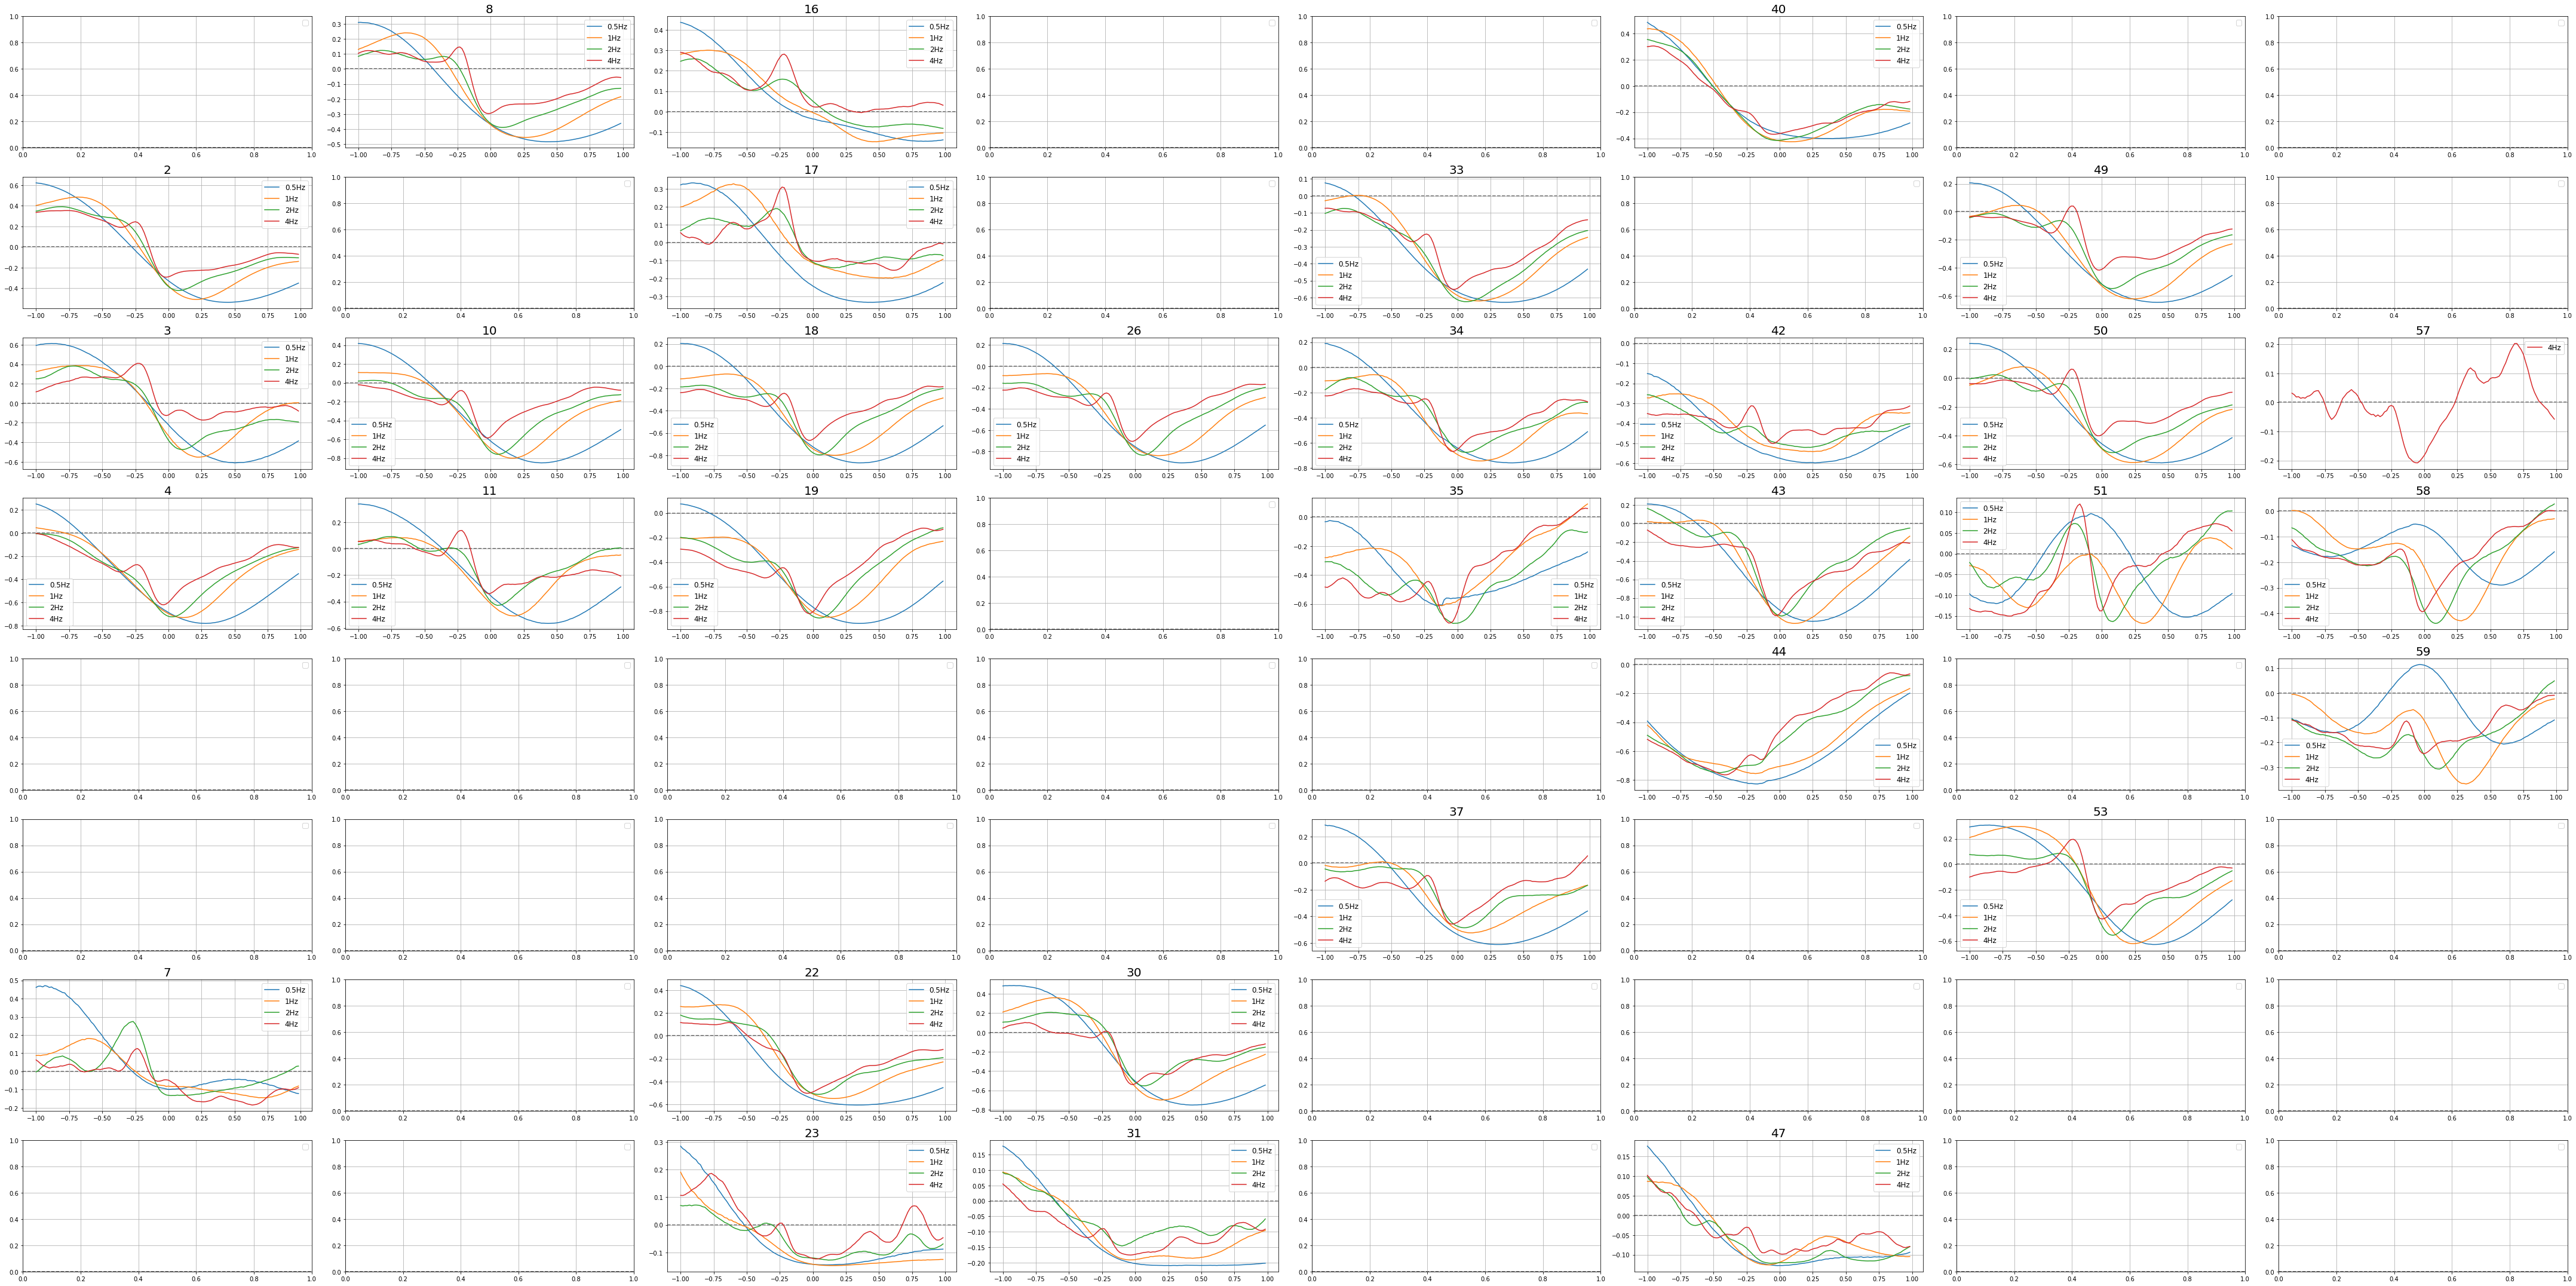

In [7]:
fig, ax = plt.subplots(nrows=8, ncols=8)
cmind = 0
for Fc in [0.5,1,2,4]:
    filename = 'merge_0727_OUsmooth_Bright_'+direction+'_G4.5_5min_Q100_6.5mW_'+str(Fc)+'Hz'
    
    MBExp = loadmat(exp_folder+'merge\\'+filename, squeeze_me =True)
    BarPos = MBExp['bin_pos']
    T=np.arange(len(BarPos))*dt+dt
    XcT = T-T[int(len(T)/2)]
    
    STA_cell = [0]*60 
    Inten_cell = [0]*60 
    for cn in np.arange(1,61):
        rstate, _ = np.histogram(MBExp['reconstruct_spikes'][cn-1], np.append(0,T))
        if not type(RFprop[cn-1]['Amplitude']) == float:     continue
        if sum(rstate)/len(rstate)/dt <= 0.3 : continue
            
        if direction == 'UD':
            Inten_cell[cn-1] = 6.5*np.array([np.sum(RFellipse[cn-1][bp-100-BS['bar_wid']-1:bp-100+BS['bar_wid'],
                                                          400-BS['bar_le']-1:400+BS['bar_wid']])  for bp in BarPos])
        x = Inten_cell[cn-1].copy()
        x = x.astype(float)
        x = (x-np.mean(x))/np.std(x)
        nXcorr = np.correlate(x, rstate, 'same')/np.correlate(np.ones_like(x), rstate, 'same')
        STA_cell[cn-1] = nXcorr[np.arange(np.where(XcT == window[0])[0],np.where(XcT ==  window[1])[0])]

        STA = STA_cell[cn-1]
        ax[np.where(figmap == cn)][0].plot(timeshift, STA, label=str(Fc)+'Hz', color = plt.cm.tab10(cmind))
        ax[np.where(figmap == cn)][0].set_title(str(cn), fontsize = 20)
    
    cmind += 1
    np.savez(exp_folder+'STA\\STA_'+filename+'.npz', STA_cell = STA_cell, timeshift = timeshift, Inten_cell = Inten_cell)
    
for ax1d in ax:
    for ax in ax1d:
        ax.axhline(0, color ='k', linestyle='--', alpha=0.75, zorder = 0)
        ax.legend(fontsize = 12)
        ax.grid()
        
fig.set_size_inches(60, 30)
fig.tight_layout()
fig.savefig(exp_folder+'STA\\Fig\\dFc_BB.tif', bbox_inches = 'tight',pad_inches = 0.3)

# BW

C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in lege

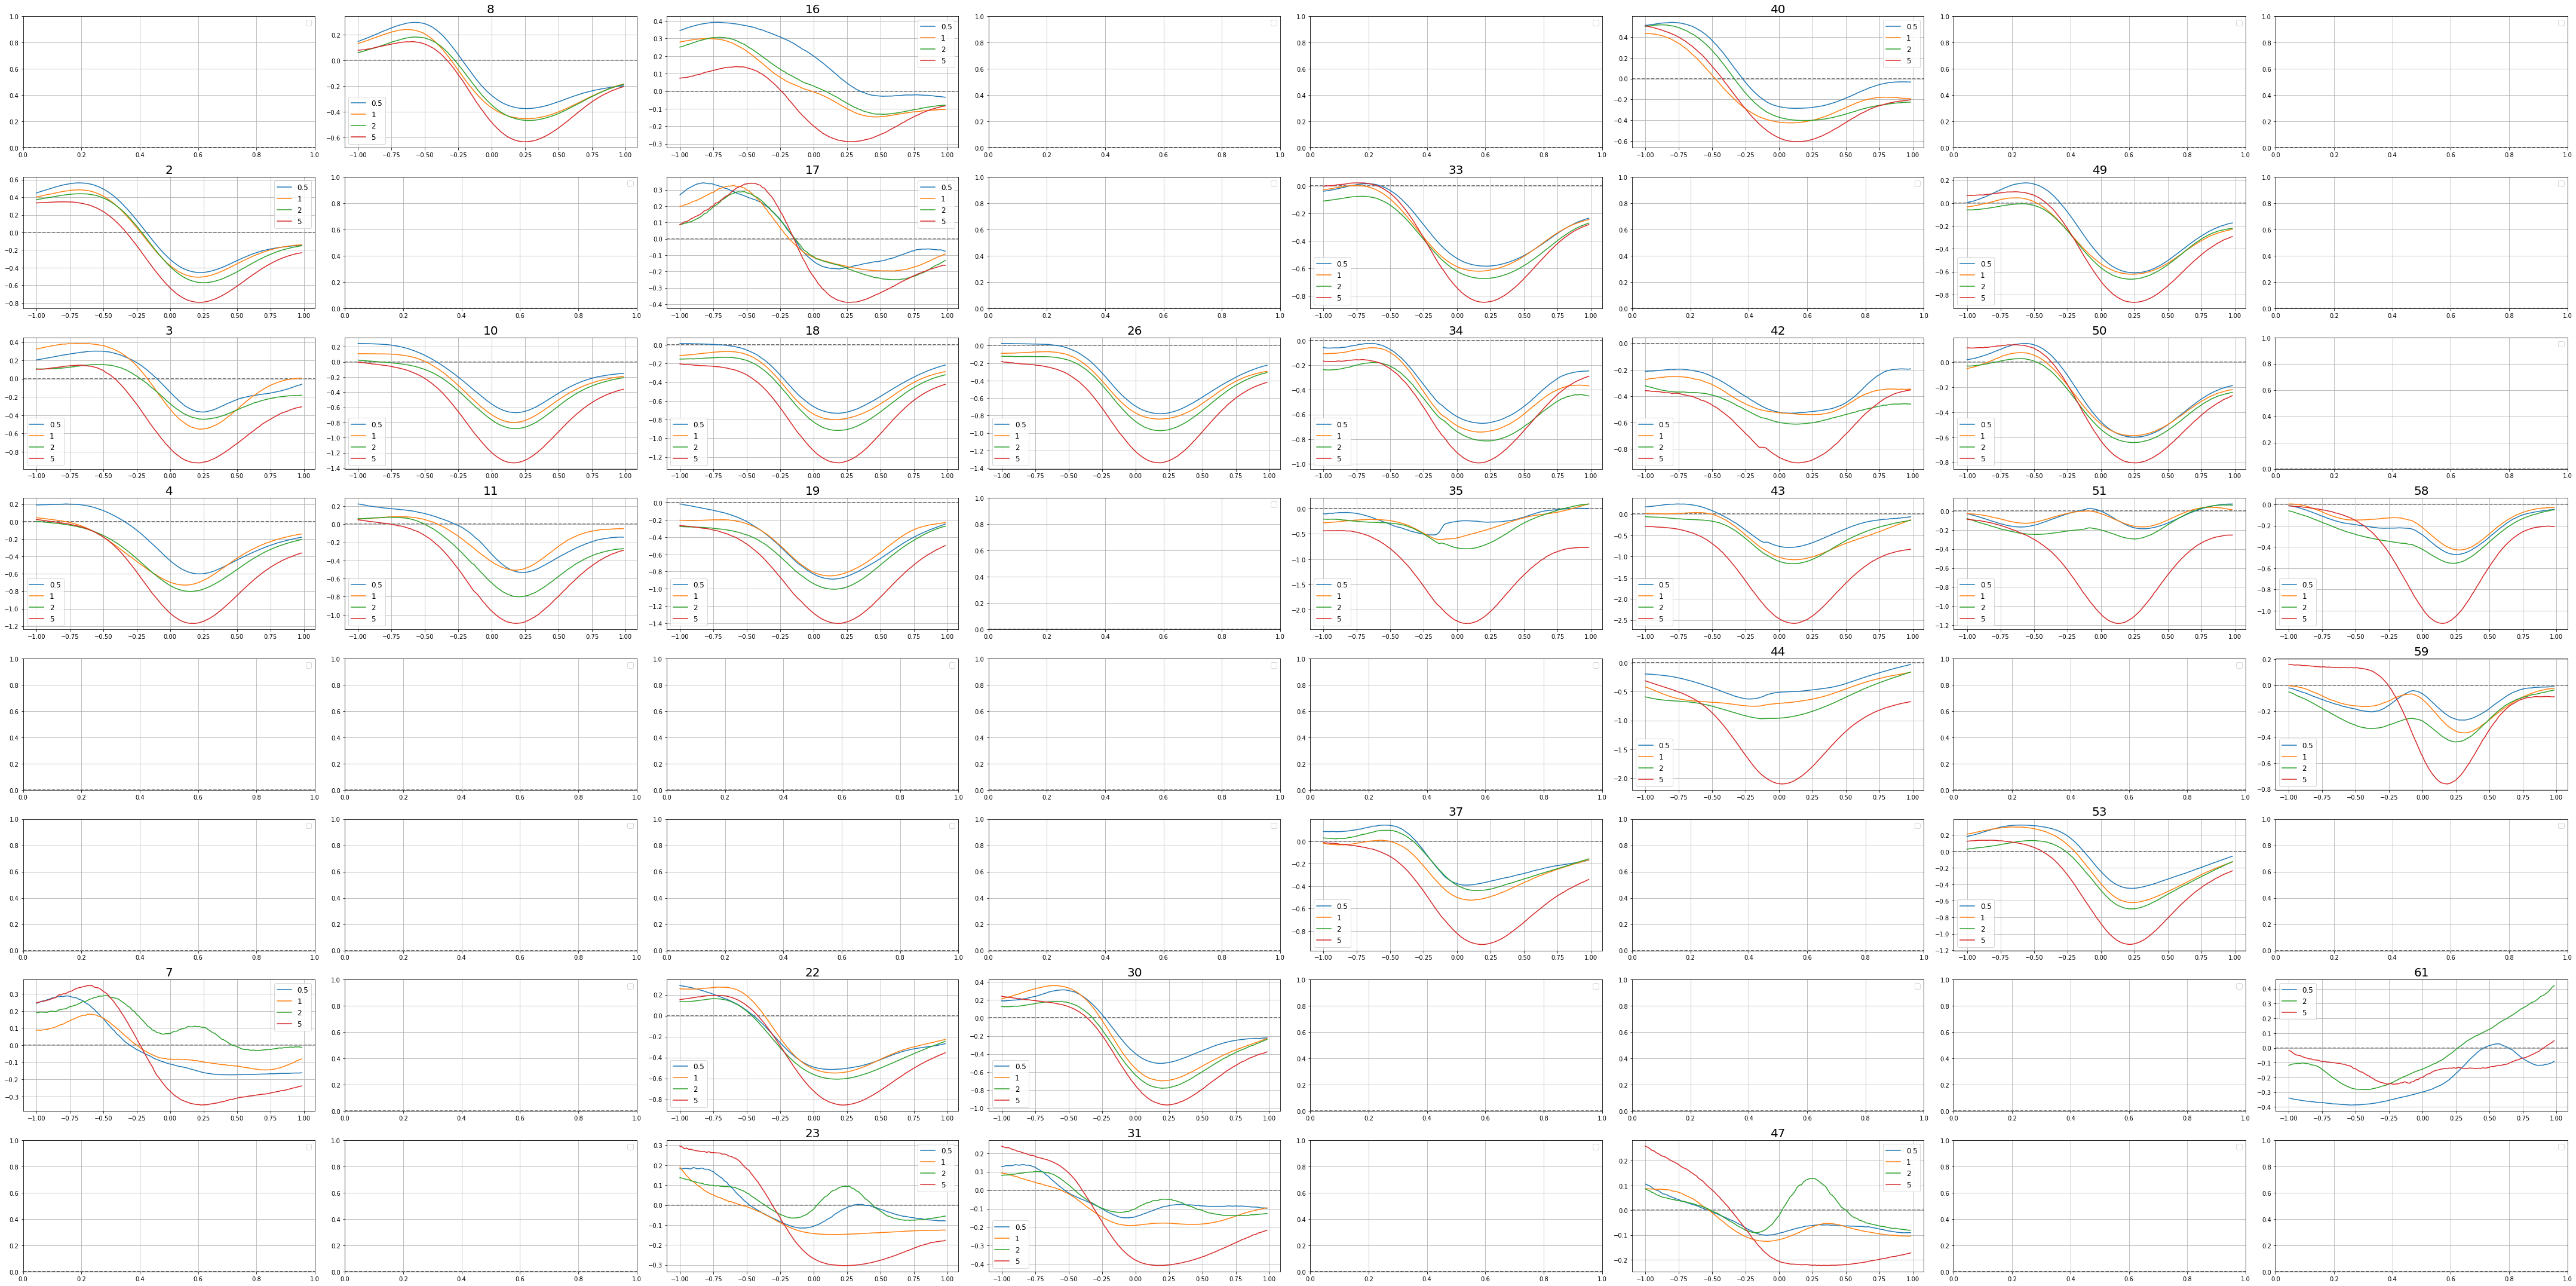

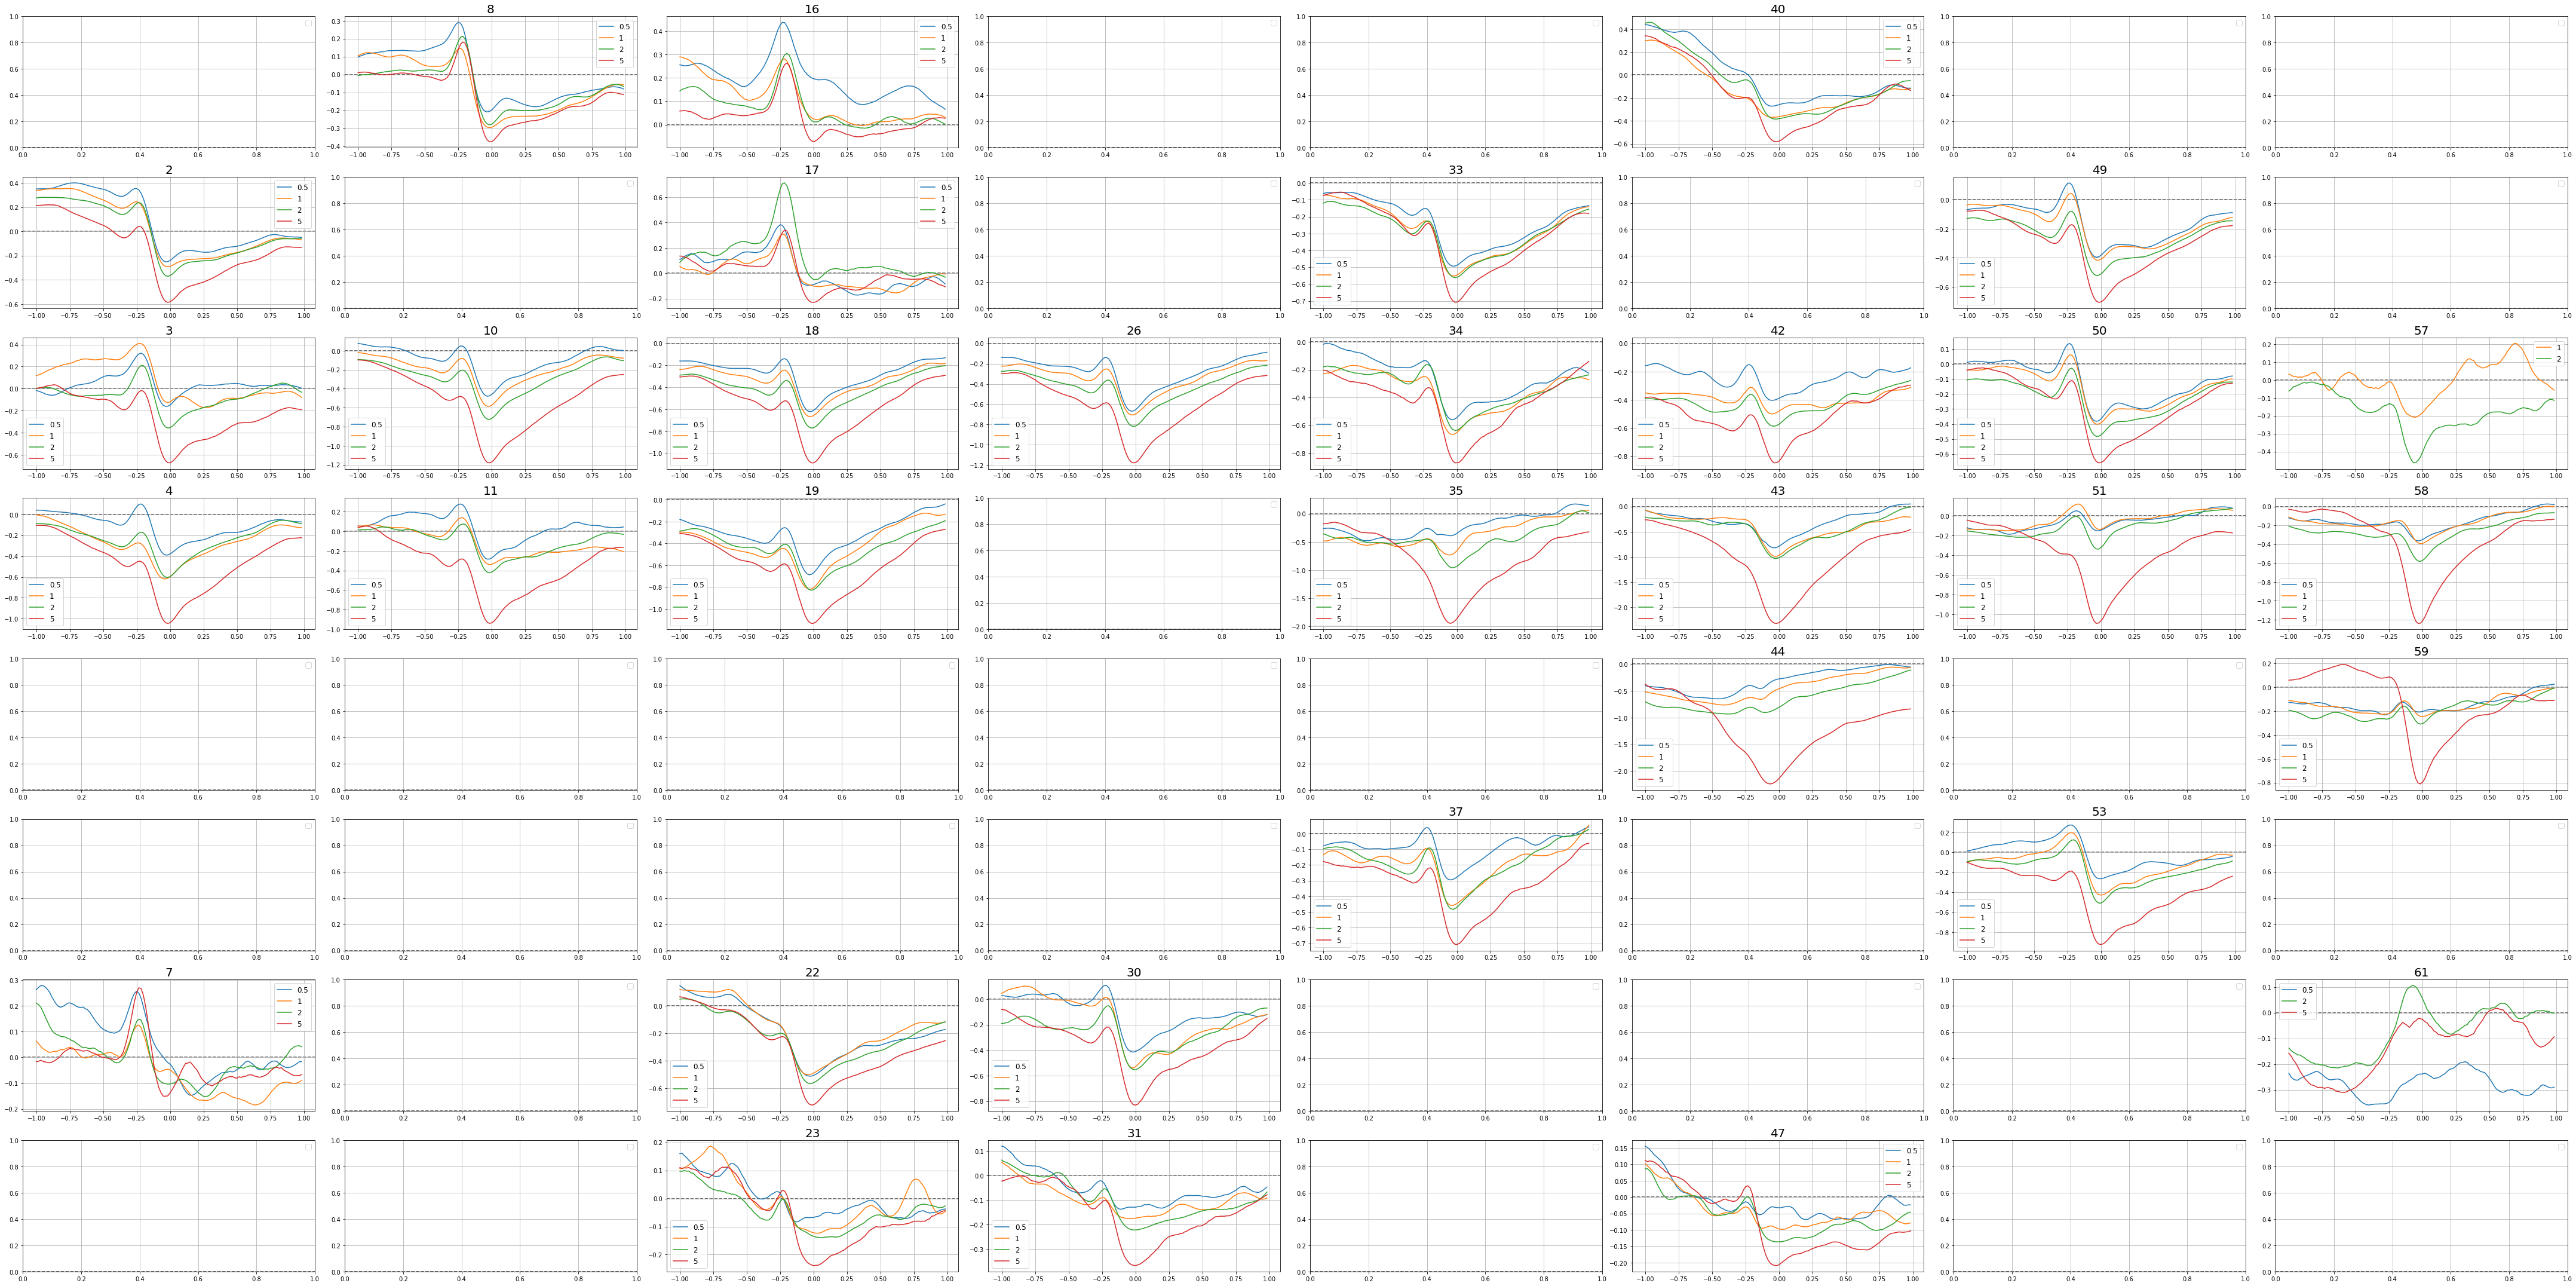

In [8]:
bW = [0.5,1,2,5]
direction = 'UD'
for Fc in [1,4]:
    fig, ax = plt.subplots(nrows=8, ncols=8)
    cmind = 0
    files = ['merge_0102_OUsmooth_Bright_'+direction+'_G4.5_5min_Q100_6.5mW_'+str(Fc)+'Hz',
             'merge_0727_OUsmooth_Bright_'+direction+'_G4.5_5min_Q100_6.5mW_'+str(Fc)+'Hz',
             'merge_2222_OUsmooth_Bright_'+direction+'_G4.5_5min_Q100_6.5mW_'+str(Fc)+'Hz',
             'merge_5555_OUsmooth_Bright_'+direction+'_G4.5_5min_Q100_6.5mW_'+str(Fc)+'Hz',]
    for i in range(len(files)):
        MBExp = loadmat(exp_folder+'merge\\'+files[i], squeeze_me =True)
        BarPos = MBExp['bin_pos']
        T=np.arange(len(BarPos))*dt+dt
        XcT = T-T[int(len(T)/2)]

        STA_cell = [0]*60 
        Inten_cell = [0]*60 
        for cn in np.arange(1,61):
            rstate, _ = np.histogram(MBExp['reconstruct_spikes'][cn-1], np.append(0,T))
            if not type(RFprop[cn-1]['Amplitude']) == float:     continue
            if sum(rstate)/len(rstate)/dt <= 0.3 : continue
            if direction == 'UD':
                Inten_cell[cn-1] = 6.5*np.array([np.sum(RFellipse[cn-1]
                                                    [bp-100-int(bW[i]*BS['bar_wid'])-1:bp-100+int(bW[i]*BS['bar_wid']),
                                                     400-BS['bar_le']-1:400+BS['bar_wid']])  for bp in BarPos])
            x = Inten_cell[cn-1].copy()
            x = x.astype(float)
            x = (x-np.mean(x))/np.std(x)
            nXcorr = np.correlate(x, rstate, 'same')/np.correlate(np.ones_like(x), rstate, 'same')
            STA_cell[cn-1] = nXcorr[np.arange(np.where(XcT == window[0])[0],np.where(XcT ==  window[1])[0])]
            STA = STA_cell[cn-1]
            ax[np.where(figmap == cn)][0].plot(timeshift, STA, label=str(bW[i]), color = plt.cm.tab10(cmind))
            ax[np.where(figmap == cn)][0].set_title(str(cn), fontsize = 20)
        cmind += 1
        np.savez(exp_folder+'STA\\STA_'+files[i]+'.npz', STA_cell = STA_cell, timeshift = timeshift, Inten_cell = Inten_cell)
    for ax1d in ax:
        for ax in ax1d:
            ax.axhline(0, color ='k', linestyle='--', alpha=0.75, zorder = 0)
            ax.legend(fontsize = 12)
            ax.grid()

    fig.set_size_inches(60, 30)
    fig.tight_layout()
    fig.savefig(exp_folder+'STA\\Fig\\dBarWid_BB_'+str(Fc)+'Hz.tif', bbox_inches = 'tight',pad_inches = 0.3) 

# Sigma

C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found

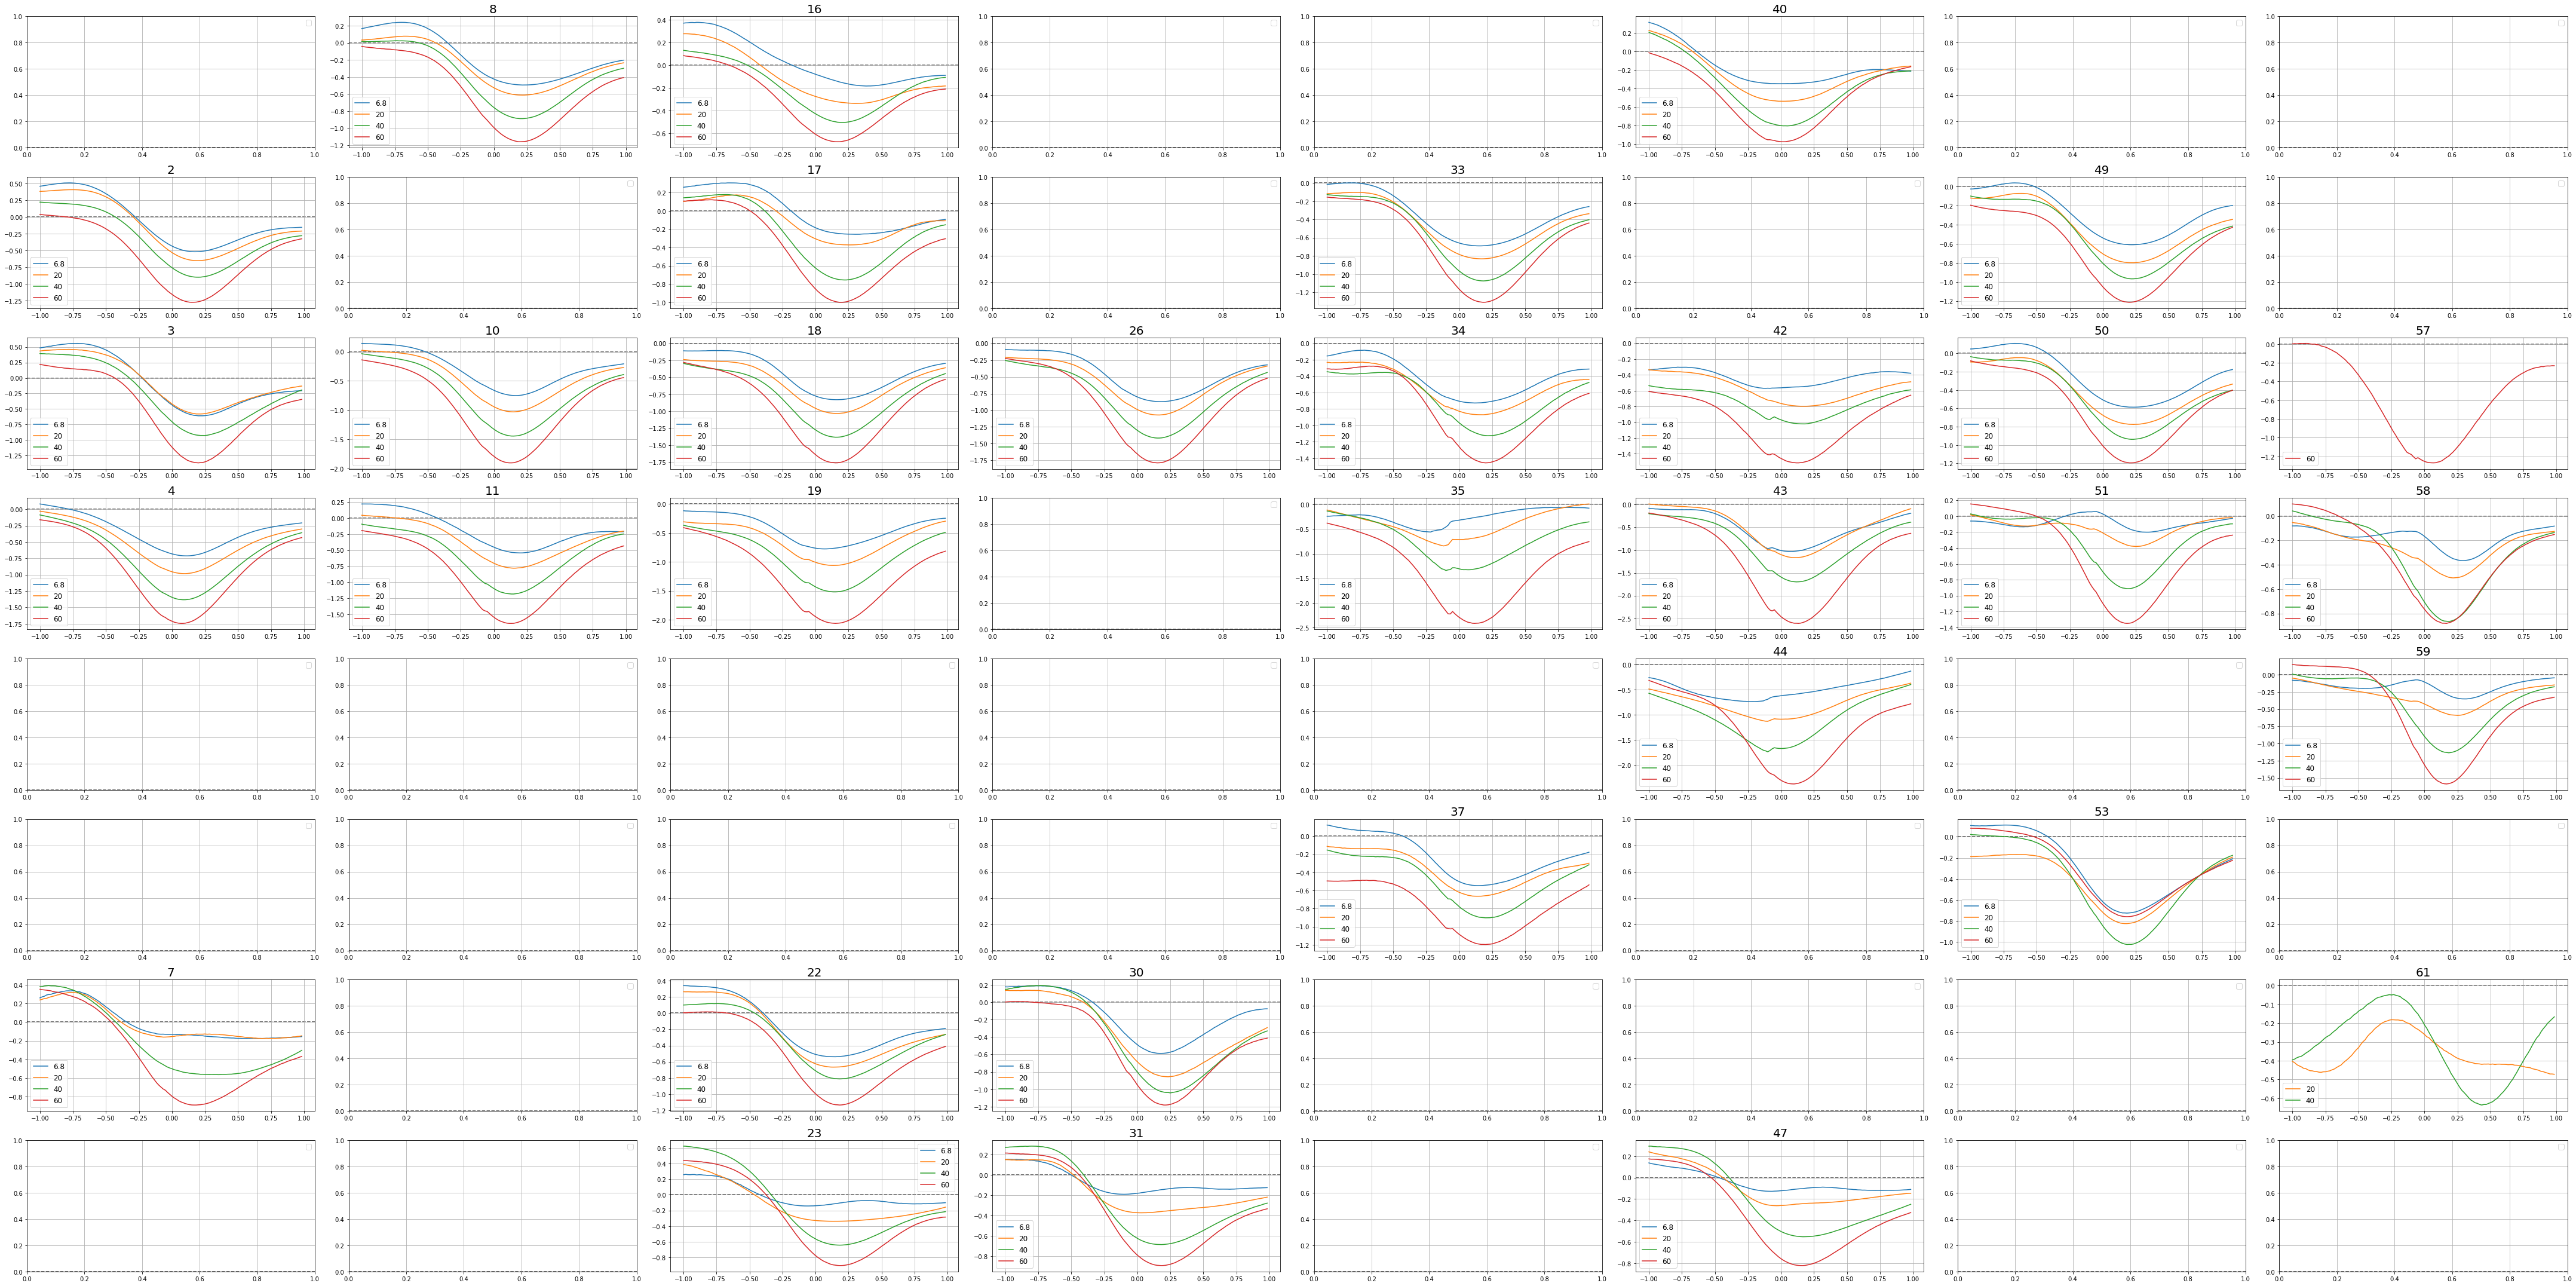

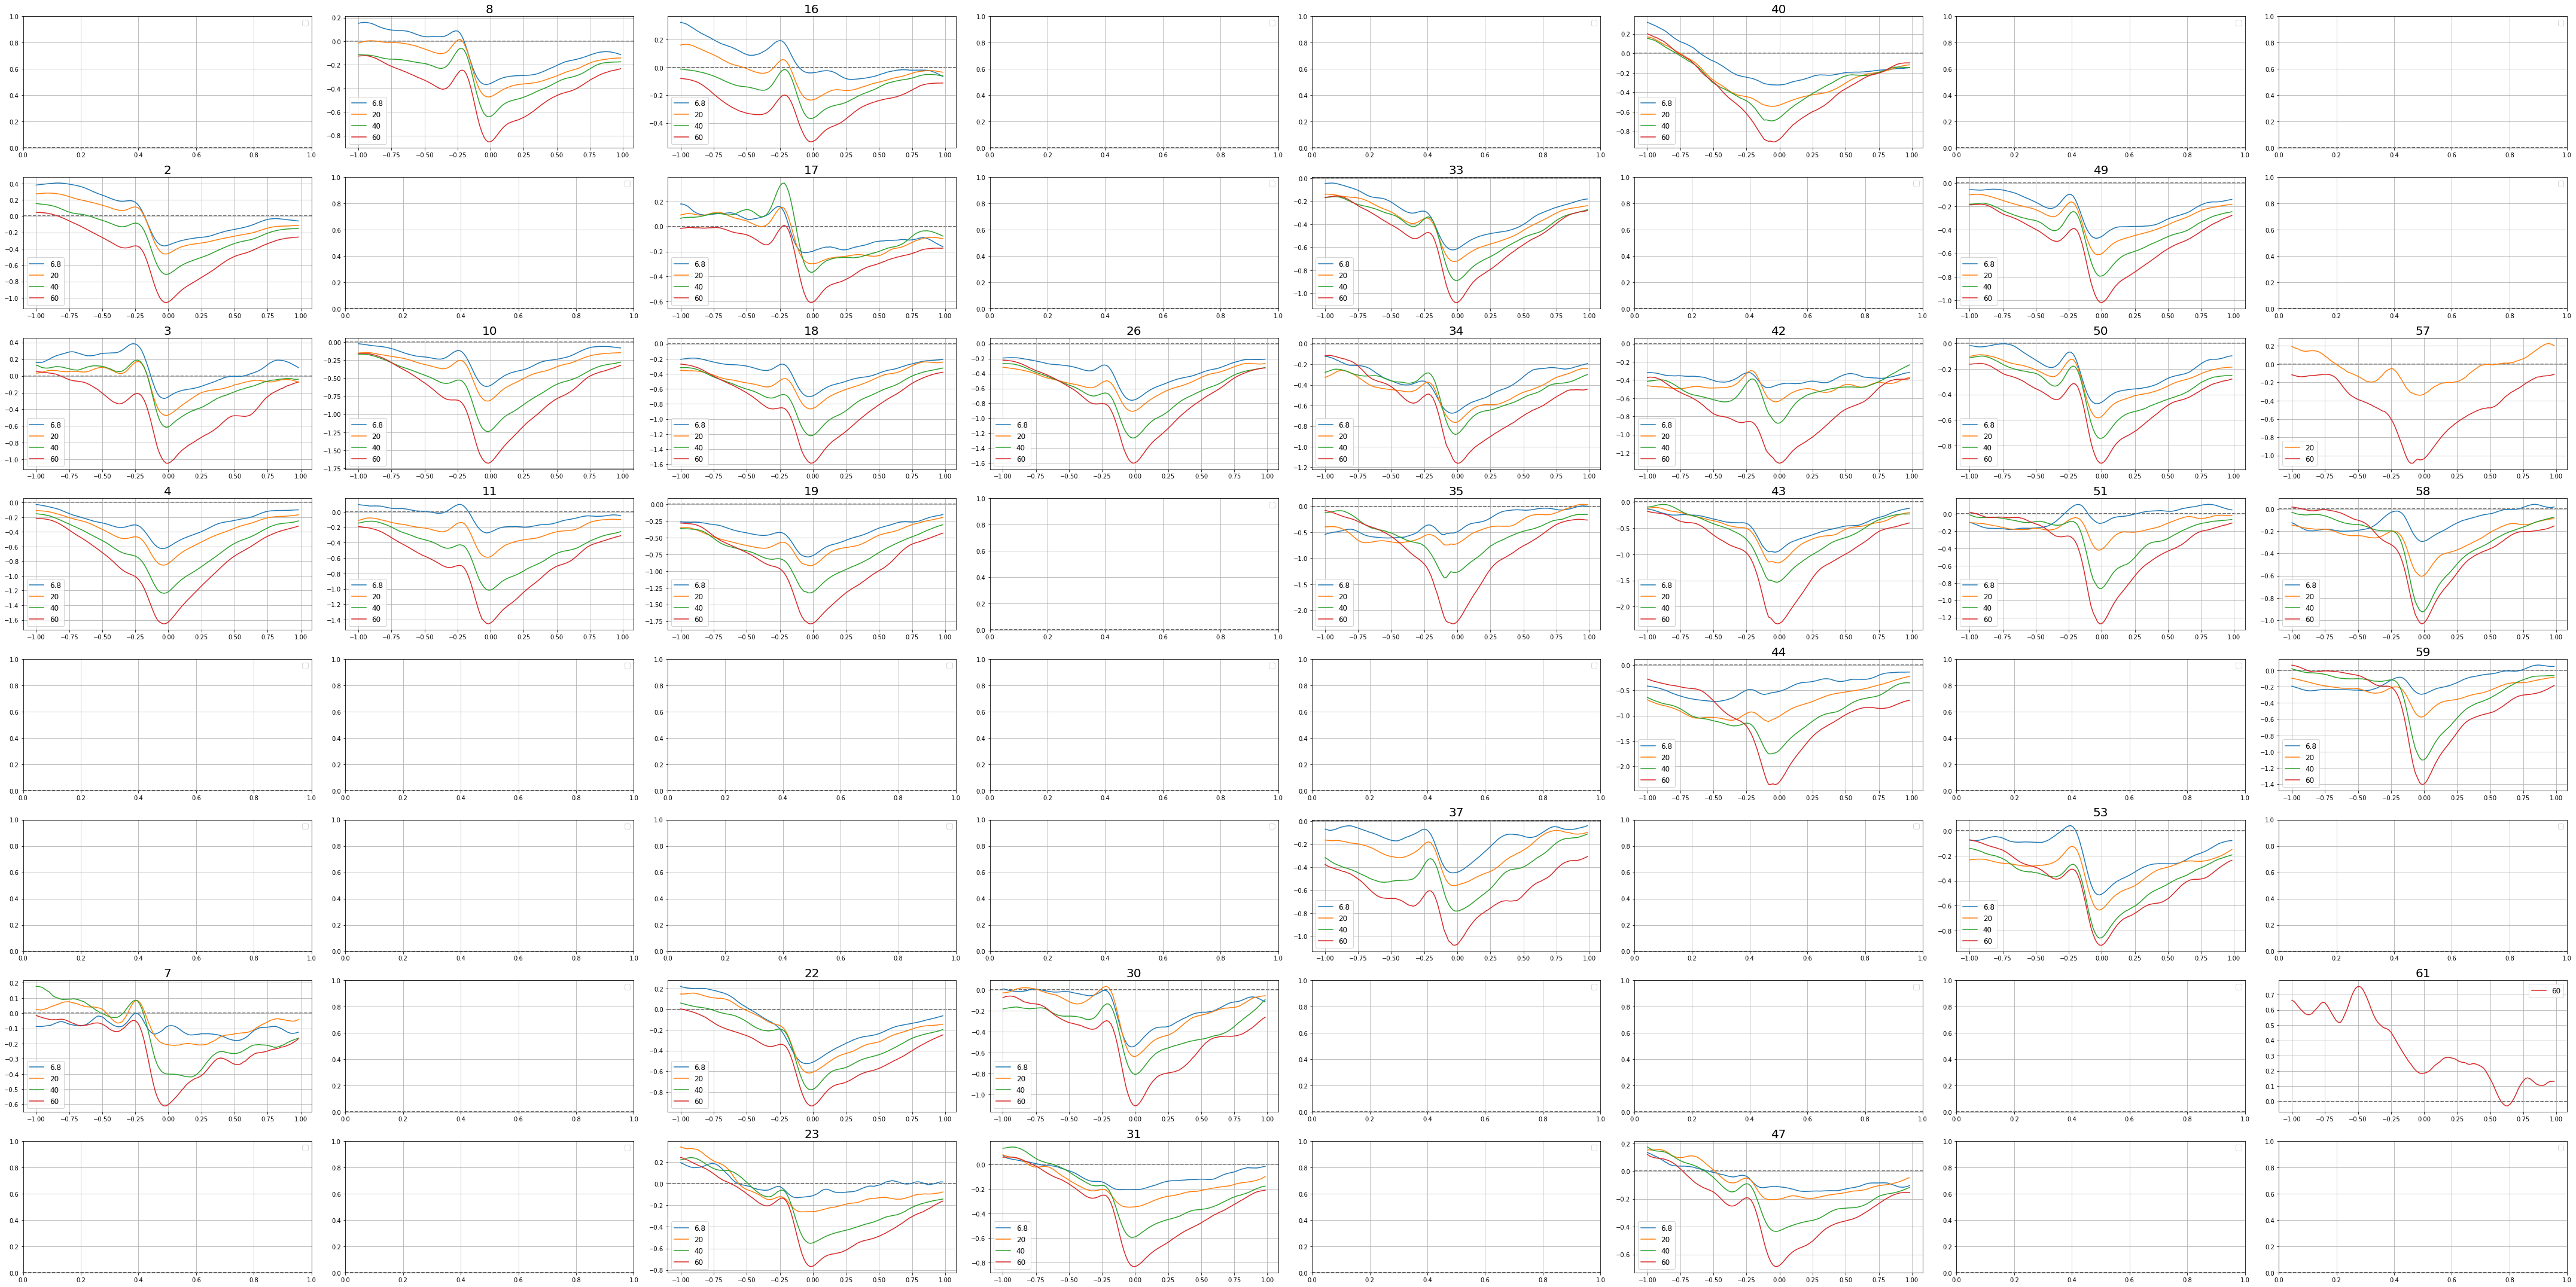

In [9]:
def Gaussian_filter_1d(x,s):
    return(np.exp(-(x/s)**2/2))

sigma = [6.8, 20, 40, 60]
direction = 'UD'
for Fc in [1,4]:
    fig, ax = plt.subplots(nrows=8, ncols=8)
    cmind = 0
    for sig in sigma:
        filename = 'merge_0505_GP_s='+str(sig)+'_OUsmooth_'+str(Fc)+'Hz_'+direction+'_6.5v0mW'
        MBExp = loadmat(exp_folder+'merge\\'+filename, squeeze_me =True)
        BarPos = MBExp['bin_pos']
        T=np.arange(len(BarPos))*dt+dt
        XcT = T-T[int(len(T)/2)]

        STA_cell = [0]*60 
        Inten_cell = [0]*60 
        for cn in np.arange(1,61):
            rstate, _ = np.histogram(MBExp['reconstruct_spikes'][cn-1], np.append(0,T))
            if not type(RFprop[cn-1]['Amplitude']) == float:     continue
            if sum(rstate)/len(rstate)/dt <= 0.3 : continue
                    
            Intenu = []
            bpu, bpui = np.unique(BarPos, return_inverse=True)
            if direction == 'UD':
                for bp in bpu:
                    bar =  6.5*Gaussian_filter_1d((np.arange(1,601)-(bp+300)), sig)
                    bar = bar[:, np.newaxis]*np.ones(800)[np.newaxis,:]
                    bar[:300-94-1, :] = 0
                    bar[300+94:, :] = 0
                    bar[:, :400-94-1] = 0
                    bar[:, 400+94:] = 0
                    Intenu.append(np.sum(bar*RFellipse[cn-1]))
                    
            Inten_cell[cn-1] = np.array(Intenu)[bpui]
            x = Inten_cell[cn-1].copy()
            x = x.astype(float)
            x = (x-np.mean(x))/np.std(x)
            nXcorr = np.correlate(x, rstate, 'same')/np.correlate(np.ones_like(x), rstate, 'same')
            STA_cell[cn-1] = nXcorr[np.arange(np.where(XcT == window[0])[0],np.where(XcT ==  window[1])[0])]
            STA = STA_cell[cn-1]
            ax[np.where(figmap == cn)][0].plot(timeshift, STA, label=str(sig), color = plt.cm.tab10(cmind))
            ax[np.where(figmap == cn)][0].set_title(str(cn), fontsize = 20)
        cmind += 1
        np.savez(exp_folder+'STA\\STA_'+filename+'.npz', STA_cell = STA_cell, timeshift = timeshift, Inten_cell = Inten_cell)
    for ax1d in ax:
        for ax in ax1d:
            ax.axhline(0, color ='k', linestyle='--', alpha=0.75, zorder = 0)
            ax.legend(fontsize = 12)
            ax.grid()

    fig.set_size_inches(60, 30)
    fig.tight_layout()
    fig.savefig(exp_folder+'STA\\Fig\\dSigma_BB_'+str(Fc)+'Hz.tif', bbox_inches = 'tight',pad_inches = 0.3)

# Background Intensity

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

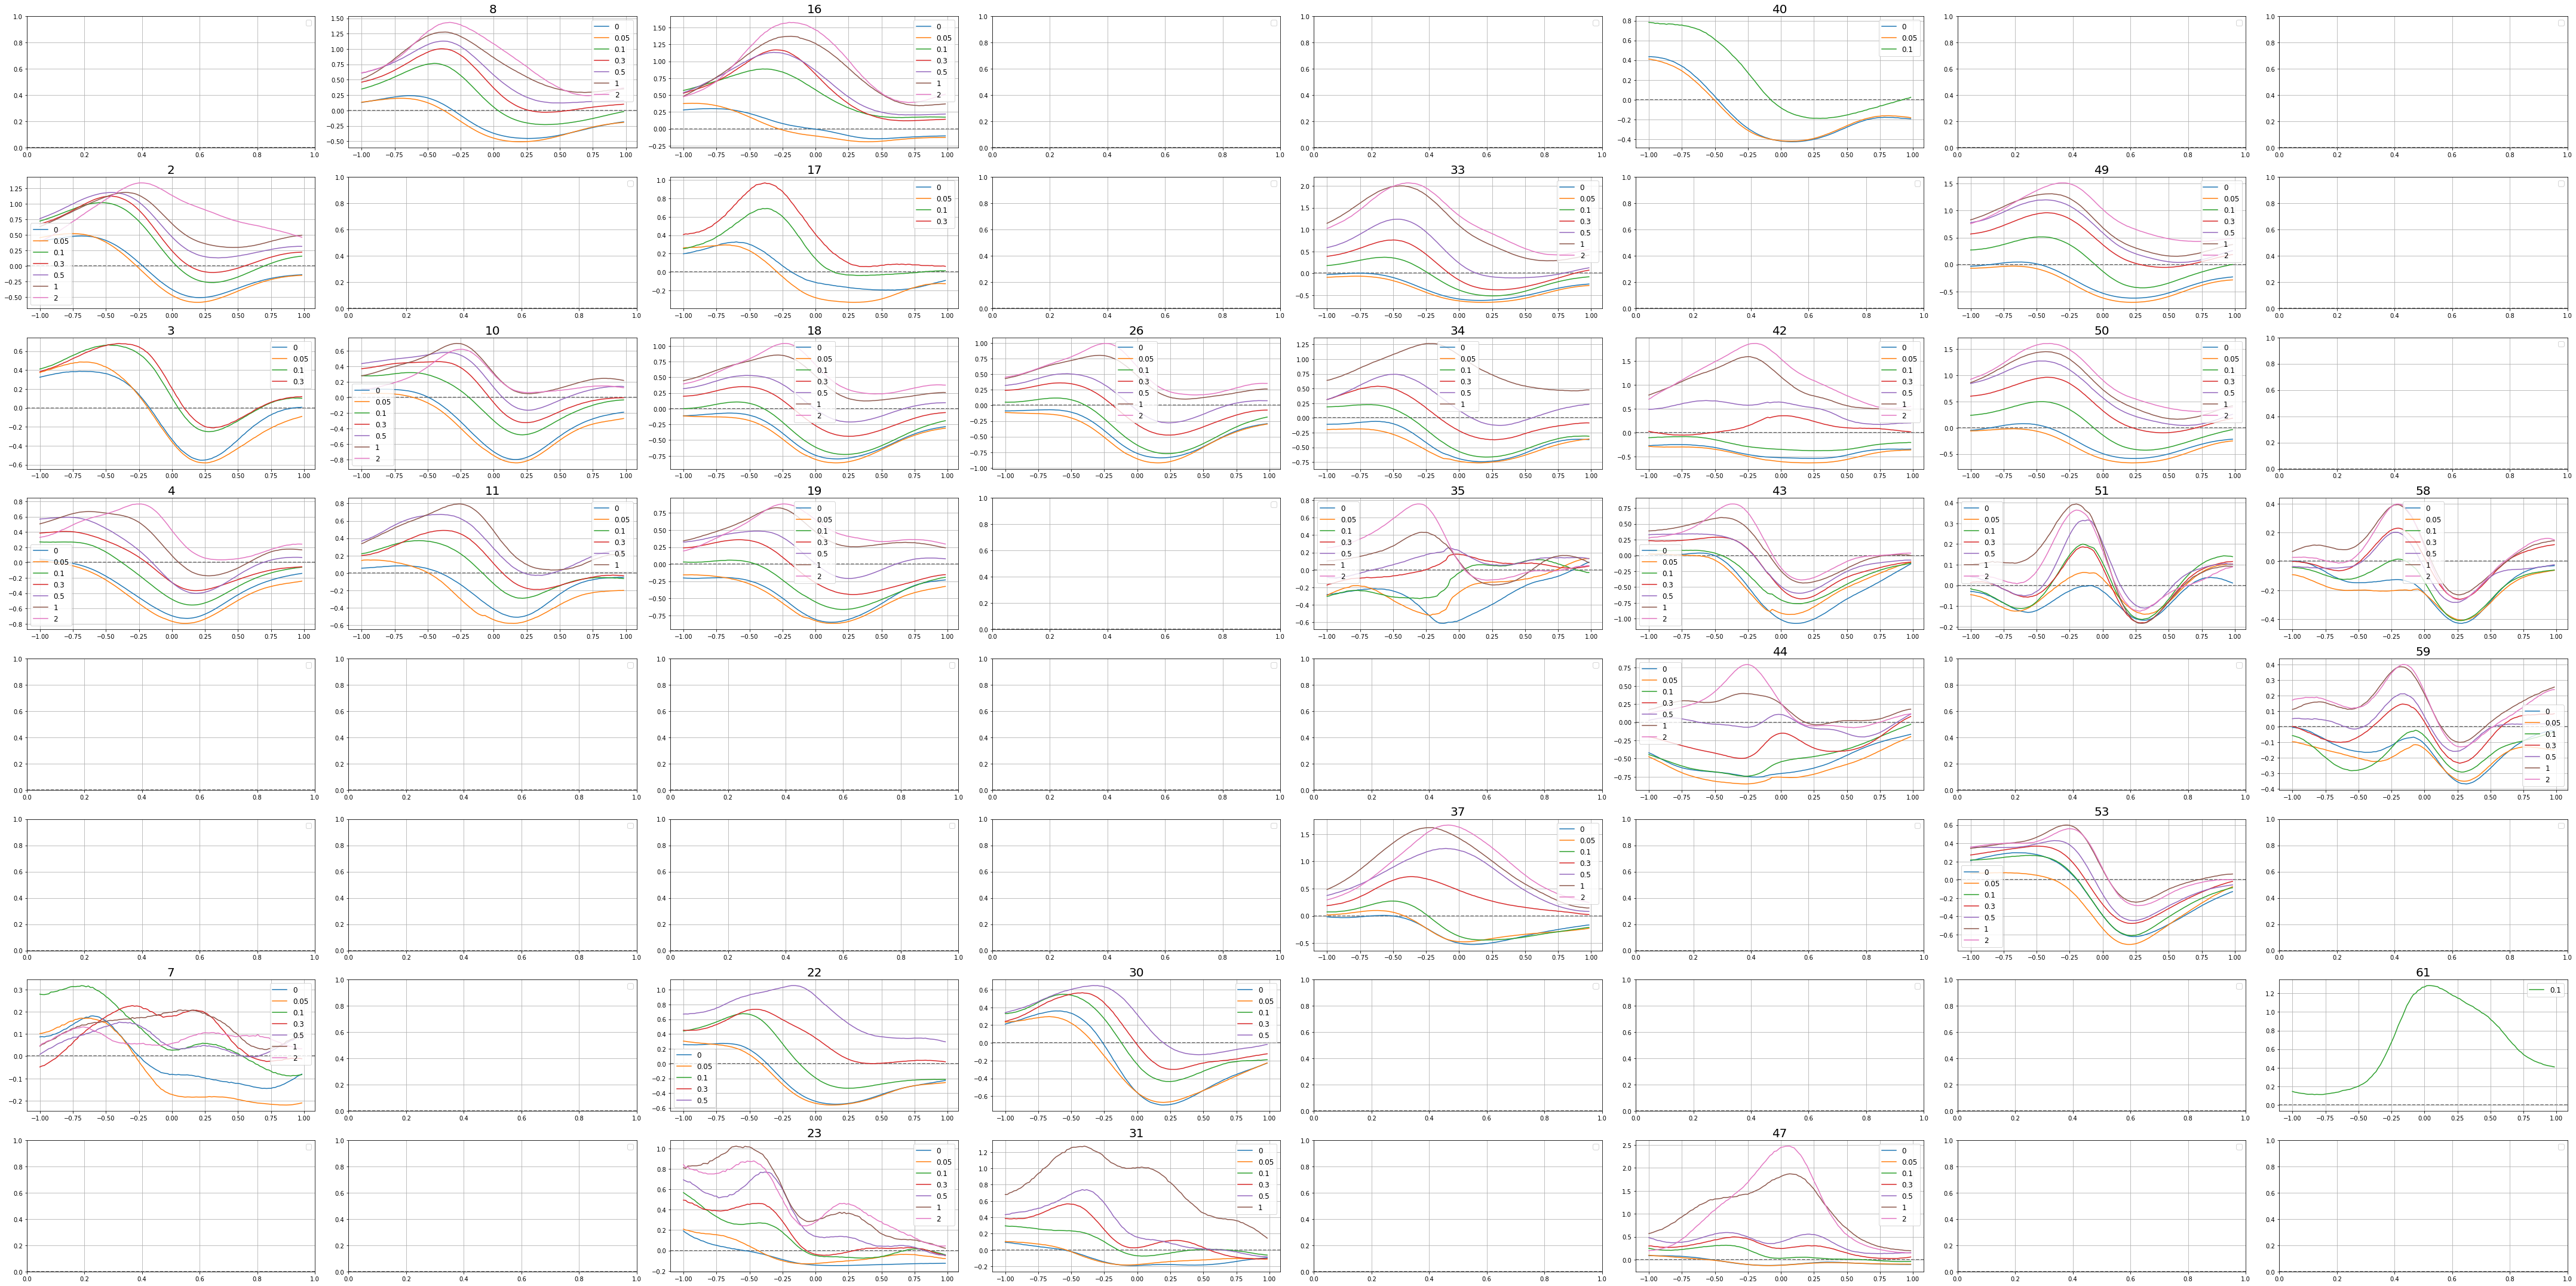

In [10]:
bI = [0, 0.05, 0.1, 0.3, 0.5, 1, 2]
direction = 'UD'
for Fc in [1]:
    fig, ax = plt.subplots(nrows=8, ncols=8)
    cmind = 0
    files = ['merge_0727_OUsmooth_Bright_'+direction+'_G4.5_5min_Q100_6.5mW_'+str(Fc)+'Hz',
             'merge_0727_OUsmooth_'+direction+'_G4.5_5min_Q100_0.05mW_12900_'+str(Fc)+'Hz',
             'merge_0727_OUsmooth_'+direction+'_G4.5_5min_Q100_0.1mW_6400_'+str(Fc)+'Hz',
             'merge_0727_OUsmooth_'+direction+'_G4.5_5min_Q100_0.3mW_2067_'+str(Fc)+'Hz',
             'merge_0727_OUsmooth_'+direction+'_G4.5_5min_Q100_0.5mW_1200_'+str(Fc)+'Hz',
             'merge_0727_OUsmooth_'+direction+'_G4.5_5min_Q100_1mW_550_'+str(Fc)+'Hz',
             'merge_0727_OUsmooth_'+direction+'_G4.5_5min_Q100_2mW_225_'+str(Fc)+'Hz']
    for i in range(len(files)):
        MBExp = loadmat(exp_folder+'merge\\'+files[i], squeeze_me =True)
        BarPos = MBExp['bin_pos']
        T=np.arange(len(BarPos))*dt+dt
        XcT = T-T[int(len(T)/2)]

        STA_cell = [0]*60 
        Inten_cell = [0]*60 
        for cn in np.arange(1,61):
            rstate, _ = np.histogram(MBExp['reconstruct_spikes'][cn-1], np.append(0,T))
            if not type(RFprop[cn-1]['Amplitude']) == float:     continue
            if sum(rstate)/len(rstate)/dt <= 0.3 : continue
            if direction == 'UD':
                Inten_cell[cn-1] = np.array([np.sum(RFellipse[cn-1][bp-100-BS['bar_wid']-1:bp-100+BS['bar_wid'],
                                                              400-BS['bar_le']-1:400+BS['bar_wid']])*(6.5-bI[i])+
                                             np.sum(RFellipse[cn-1][300-94-1:300+94,400-94-1:400+94])*bI[i]  for bp in BarPos])
            x = Inten_cell[cn-1].copy()
            x = x.astype(float)
            x = (x-np.mean(x))/np.std(x)
            nXcorr = np.correlate(x, rstate, 'same')/np.correlate(np.ones_like(x), rstate, 'same')
            STA_cell[cn-1] = nXcorr[np.arange(np.where(XcT == window[0])[0],np.where(XcT ==  window[1])[0])]
            STA = STA_cell[cn-1]
            ax[np.where(figmap == cn)][0].plot(timeshift, STA, label=str(bI[i]), color = plt.cm.tab10(cmind))
            ax[np.where(figmap == cn)][0].set_title(str(cn), fontsize = 20)
        cmind += 1
        np.savez(exp_folder+'STA\\STA_'+files[i]+'.npz', STA_cell = STA_cell, timeshift = timeshift, Inten_cell = Inten_cell)
    for ax1d in ax:
        for ax in ax1d:
            ax.axhline(0, color ='k', linestyle='--', alpha=0.75, zorder = 0)
            ax.legend(fontsize = 12)
            ax.grid()

    fig.set_size_inches(60, 30)
    fig.tight_layout()
    fig.savefig(exp_folder+'STA\\Fig\\dBackIn_BB_'+str(Fc)+'Hz.tif', bbox_inches = 'tight',pad_inches = 0.3) 